In [27]:
# Import necessary libraries

import re
import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as ex
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
# Read data from CSV files
modi_data = pd.read_csv('preprocessed_modi_data.csv')
rahul_data = pd.read_csv('preprocessed_rahul_data.csv')

In [29]:
# Explore the Modi data
modi_data.shape

(25683, 2)

In [30]:
modi_data.sample(10)

,User,Tweet
23522,uday3393,opposit parti india omarabdullah mamataoffici ...
14825,gvrchandra,kaalateetham bjpindia narendramodi except modi...
4892,HelpPolitics,narendramodi ddnewsliv rajyasabhatv rebuild ra...
23195,ProfSRK,rahulgandhi new campaign strategi come loksabh...
21735,Dharm90Incbihar,narendramodi ur work sameless sir say better c...
19391,DEArdeshir,irobertvadra cmon get real incindia preciou li...
3913,kashivar,loksabhaelect mainbhichowkidar rahulgandhi b p...
14365,SJVatsal,yearchalleng india use rank eas busi modi govt...
3787,onlyursmusa,dont vote blindlykeep eye vote machinesvvpat m...
14169,Vatsanjeev,mohitmrao ramguha andaleebrahman cornel univ a...


In [31]:
# Explore the Rahul data
rahul_data.shape

(14261, 2)

In [32]:
rahul_data.sample(10)

,User,Tweet
12359,prabukailasam,mr rahulgandhi what ur answer tamilnadu peopl ...
11711,SocioPoliticalW,ghoshkk parthage sadhavi rahulgandhi mamataoff...
10991,shivamsverma,st ls elect saw ls amp thing comon visit rahul...
7057,prashantsinha68,offici entri priyanka gandhi prove congress pa...
7123,LinySajan,indiatoday dramsinghvi consid fact laid indiat...
3688,Jiten_Sourav,ani sad see everi congressman believ rahul gan...
1373,core_indian,druditraj rahulgandhi incindia incdelhi someth...
1054,r04han,incindia rahulgandhi cnnnew rahul father kill ...
4715,sozEwatan,loksabhaelect wewantgandhifreecongress see mod...
516,pmaliens,sampitroda sam chacha csi start tc start patni...


In [33]:
# Define a function to find the polarity of a review using TextBlob
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [34]:
# Apply polarity analysis to Modi data
modi_data['Polarity'] = modi_data['Tweet'].apply(find_polarity)

# Apply polarity analysis to Rahul data
rahul_data['Polarity'] = rahul_data['Tweet'].apply(find_polarity)

In [35]:
modi_data.head()

,User,Tweet,Polarity
0,advosushildixit,anjanaomkashyap see futur bjp spokesperson goo...,0.193750
1,jiaeur,loksabhaelect rd may reveal even ecisveep coul...,0.800000
2,PVenkatGandhi,loksabhaelect rd may reveal even ecisveep coul...,0.800000
3,TheNirbhay1,pm modi creat new record pm democrat countri c...,0.578788
4,ShakeChilli,abhijitmajumd appoint successor god forbid all...,0.274091


In [36]:
rahul_data.head()

,User,Tweet,Polarity
0,Sunnysweet16,wonder academ journalist ask inc india rahul g...,0.000000
1,drnitinchaube,congrat chang australiavot scottmorrison sir w...,0.000000
2,mrvivek07,peopel say govt ne year kya kiya uns pucho yea...,0.000000
3,JosephPravinP,ajaymaken rahulgandhi final touch modi ji prov...,0.480000
4,VandanaMegastar,loksabhaelect anyon mass back cant visionari p...,-0.166667


In [37]:
# Assign sentiment labels based on polarity
modi_data['Label'] = np.where(modi_data['Polarity'] > 0, 'positive', 'negative')
modi_data['Label'][modi_data['Polarity'] == 0] = 'neutral'

rahul_data['Label'] = np.where(rahul_data['Polarity'] > 0, 'positive', 'negative')
rahul_data['Label'][rahul_data['Polarity'] == 0] = 'neutral'

<ipython-input-37-531b3c4ae76c>:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-37-531b3c4ae76c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [38]:
modi_data.sample(20)

,User,Tweet,Polarity,Label
11189,AmitKrSingh___,bjp want fight bring nation fine nation far fa...,0.279167,positive
21563,AdvShrutidesai,one staff member son year old say vote ask wan...,0.022222,positive
19015,Shivamagr03,aajtak ho gaya start inka rona evm ke name par...,0.608333,positive
9336,krishnakant_75,believ debat niravmodi indiatoday shivam vij n...,0.000000,neutral
25676,CrazySatire,hindutva follow modi trust leader islam countr...,0.000000,neutral
16395,ampartha_,mayhem west bengal tmc goon hooghli barrackpor...,0.800000,positive
21489,nitin_nitingarg,ban pubg game india danger societi kid loksabh...,-0.400000,negative
14166,unbrahmachari,asitkumarrmodi narendramodi vijayrupanibjp alp...,0.000000,neutral
12905,NamasteMitro,nowaday congress ppl advertis priyankagandhi i...,-0.040909,negative
15630,tfarcdrow,brakeswitch freefrank anupampkh genvksingh nar...,1.000000,positive


In [39]:
rahul_data.sample(20)

,User,Tweet,Polarity,Label
2703,prateikvernekar,rahulgandhi dear pappu pleas shame everyon giv...,0.183333,positive
3863,sanjaymishra42,ashoswai yet anoth desper attempt modi get vot...,0.500000,positive
8773,AbhayRawal,tajinderbagga druditraj rahulgandhi dear seema...,0.350000,positive
8181,roarDworld,shehzadind rahulgandhi mr rahulgandhi follow n...,0.225000,positive
310,CosmicBlessings,smitaprakash gauravcsaw upcom bride itali rahu...,-0.500000,negative
2853,rameshsays,madvers basic got undu favour congress govt op...,0.300000,positive
11145,PursueRam,economictim mamataoffici rahulgandhi hight int...,0.000000,neutral
6433,optimistsurgeon,indiapolici year quot u scientist name rahulga...,0.333333,positive
11695,ItsmeOhgod,missionbjp wittynisha smritiirani rahulgandhi ...,0.300000,positive
11589,leo_naveen,zeenew fir se bina calcul ka jhooth bewakuf ba...,0.000000,neutral


In [40]:
# Remove neutral Modi reviews
neutral_modi_reviews = modi_data[modi_data['Polarity'] == 0.0000]
remove_modi_neutral_reviews = modi_data['Polarity'].isin(neutral_modi_reviews['Polarity'])
modi_data.drop(modi_data[remove_modi_neutral_reviews].index, inplace=True)

# Remove neutral Rahul reviews
neutral_rahul_reviews = rahul_data[rahul_data['Polarity'] == 0.0000]
remove_rahul_neutral_reviews = rahul_data['Polarity'].isin(neutral_rahul_reviews['Polarity'])
rahul_data.drop(rahul_data[remove_rahul_neutral_reviews].index, inplace=True)

In [41]:
print(neutral_modi_reviews.shape)
print(modi_data.shape)
print('\n')
print(neutral_rahul_reviews.shape)
print(rahul_data.shape)

(9702, 4)
(15981, 4)


(5849, 4)
(8412, 4)


In [42]:
# Randomly remove reviews to balance the dataset
np.random.seed(10)
remove_n_modi = 8481
drop_indices_modi = np.random.choice(modi_data.index, remove_n_modi, replace=True)
df_modi_data = modi_data.drop(drop_indices_modi)

np.random.seed(10)
remove_n_rahul = 360
drop_indices_rahul = np.random.choice(rahul_data.index, remove_n_rahul, replace=True)
df_rahul_data = rahul_data.drop(drop_indices_rahul)

In [43]:
print(modi_data.shape)
print(rahul_data.shape)
print('\n')
print(df_modi_data.shape)
print(df_rahul_data.shape)

(15981, 4)
(8412, 4)


(9393, 4)
(8057, 4)


# Prediction about Election on the bases of polarity and sentiment score

In [44]:
# Calculate the percentage of negative and positive reviews for Modi
modi_count = df_modi_data.groupby('Label').count()

modi_total_reviews = len(df_modi_data)
neg_modi = (modi_count['Polarity'][0] / modi_total_reviews) * 100
pos_modi = (modi_count['Polarity'][1] / modi_total_reviews) * 100

# Calculate the percentage of negative and positive reviews for Rahul
rahul_count = df_rahul_data.groupby('Label').count()

rahul_total_reviews = len(df_rahul_data)
neg_rahul = (rahul_count['Polarity'][0] / rahul_total_reviews) * 100
pos_rahul = (rahul_count['Polarity'][1] / rahul_total_reviews) * 100

<ipython-input-44-5fed1b1a65df>:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-44-5fed1b1a65df>:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-44-5fed1b1a65df>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-44-5fed1b1a65df>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

In [45]:
print(f'Percentage of negative reviews for Modi: {neg_modi:.2f}%')
print(f'Percentage of positive reviews for Modi: {pos_modi:.2f}%')
print('\n')
print(f'Percentage of negative reviews for Rahul: {neg_rahul:.2f}%')
print(f'Percentage of positive reviews for Rahul: {pos_rahul:.2f}%')

Percentage of negative reviews for Modi: 25.08%
Percentage of positive reviews for Modi: 74.92%


Percentage of negative reviews for Rahul: 30.72%
Percentage of positive reviews for Rahul: 69.28%


In [46]:
# Calculate average polarity for each candidate
modi_data['Polarity'] = modi_data['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
rahul_data['Polarity'] = rahul_data['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate total sentiment score
modi_total_polarity = modi_data['Polarity'].sum()
rahul_total_polarity = rahul_data['Polarity'].sum()

# Determine the winner
if modi_total_polarity > rahul_total_polarity:
    winner = "Modi"
else:
    winner = "Rahul"

print(f"The predicted winner is: {winner}")


The predicted winner is: Modi


In [47]:
politicians = ['Narendra Modi', 'Rahul Gandhi']
neg_list = [neg_modi, neg_rahul]
pos_list = [pos_modi, pos_rahul]

fig = go.Figure(
    data=[
        go.Bar(name = 'Negative', x = politicians, y = neg_list, marker_color = 'red'),
        go.Bar(name = 'Positive', x = politicians, y = pos_list, marker_color = 'green')
    ]
)
fig.update_layout(barmode = 'group')
fig.show()

# Creating word clouds for both Modi and Rahul reviews

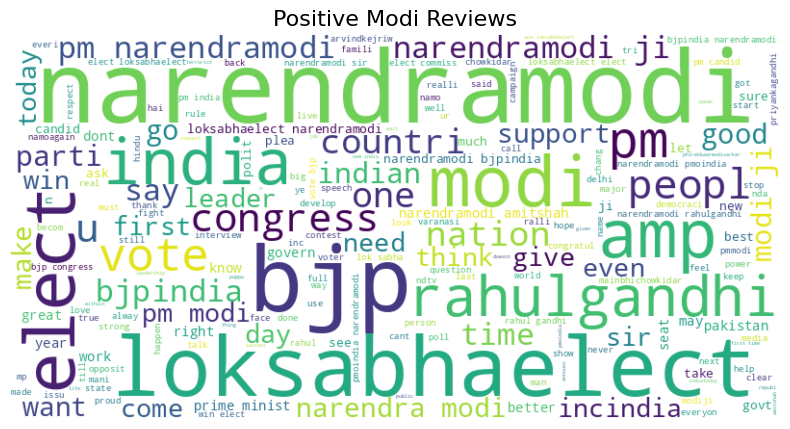

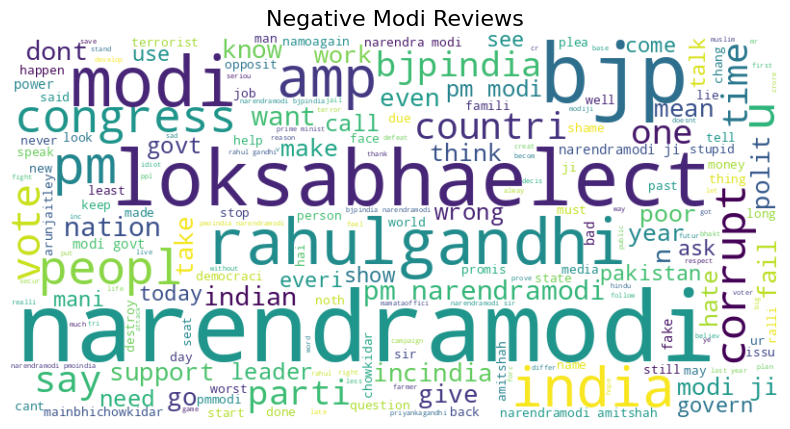

In [48]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative Modi reviews
positive_modi_reviews = df_modi_data[df_modi_data['Label'] == 'positive']['Tweet']
negative_modi_reviews = df_modi_data[df_modi_data['Label'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_modi_text = ' '.join(positive_modi_reviews)
negative_modi_text = ' '.join(negative_modi_reviews)

# Generate and display word clouds for Modi
generate_word_cloud(positive_modi_text, 'Positive Modi Reviews')
generate_word_cloud(negative_modi_text, 'Negative Modi Reviews')

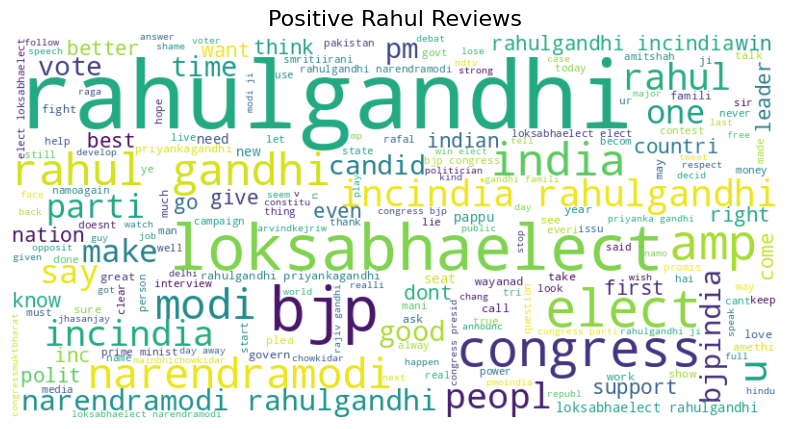

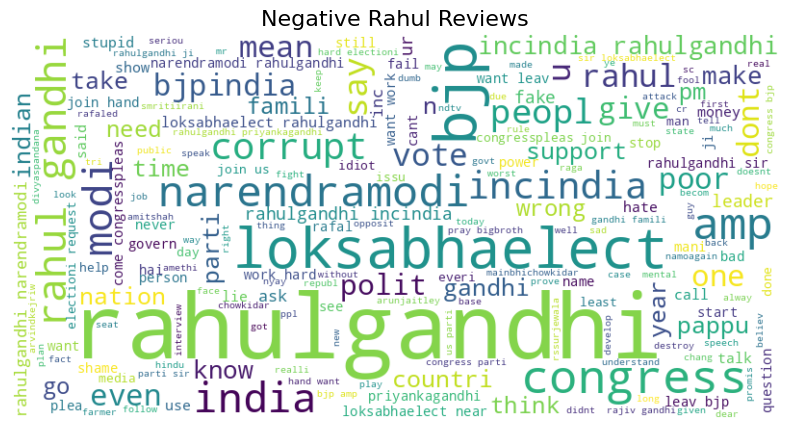

In [49]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative Modi reviews
positive_rahul_reviews = df_rahul_data[df_rahul_data['Label'] == 'positive']['Tweet']
negative_rahul_reviews = df_rahul_data[df_rahul_data['Label'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_rahul_text = ' '.join(positive_rahul_reviews)
negative_rahul_text = ' '.join(negative_rahul_reviews)

# Generate and display word clouds for Modi
generate_word_cloud(positive_rahul_text, 'Positive Rahul Reviews')
generate_word_cloud(negative_rahul_text, 'Negative Rahul Reviews')